<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Hackathon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the DataSet**

In [62]:
import pandas as pd
df_raw_train=pd.read_csv("/content/drive/MyDrive/Hackathon/Participants_Data_THL/train.csv")

In [63]:
df_raw_test=pd.read_csv("/content/drive/MyDrive/Hackathon/Participants_Data_THL/test.csv")

In [64]:
df_raw_train.shape

(42748, 14)

In [65]:
df_raw_test.shape

(18321, 14)

In [66]:
df_raw_train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [7]:
df_raw_test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,4.68,x,w,f,x,w,8.22,9.58,n,t,NaN,g,NaN
1,p,10.33,x,y,f,a,y,11.98,13.29,y,t,NaN,d,NaN
2,p,9.26,x,w,t,NaN,w,7.41,12.68,w,t,l,g,NaN
3,p,14.90,s,w,t,d,w,5.33,23.03,w,f,f,d,NaN
4,p,1.01,x,w,f,a,w,3.17,1.64,e,f,f,l,NaN


In [67]:
df_raw_train.isna().sum()

edible-poisonous           0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         6940
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1719
habitat                    0
season                     0
dtype: int64

In [68]:
df_raw_test.isna().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2944
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                 752
habitat                     0
season                  18321
dtype: int64

**Data Preprocessing**

1. Filled Nan Values with Mode values also tried with removing Nan Values.

2. Removing Outliers 

Filled Nan Value with Mode

In [69]:
df_raw_train['gill-attachment'].fillna(df_raw_train['gill-attachment'].mode()[0], inplace=True)

In [70]:
df_raw_train['gill-attachment'].isna().sum()

0

In [71]:
df_raw_test['gill-attachment'].fillna(df_raw_test['gill-attachment'].mode()[0], inplace=True)

In [73]:
df_raw_test['gill-attachment'].isna().sum()

0

In [75]:
df_raw_train['ring-type'].fillna(df_raw_train['ring-type'].mode()[0], inplace =True)

In [76]:
df_raw_train['ring-type'].isna().sum()

0

In [77]:
df_raw_test['ring-type'].fillna(df_raw_test['ring-type'].mode()[0], inplace =True)

In [78]:
df_raw_test['ring-type'].isna().sum()

0

In [79]:
df_raw_train.isna().sum()

edible-poisonous        0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [80]:
df_raw_test.isna().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                  18321
dtype: int64

**Checking the outliers through Box Plot**

In [81]:
import numpy as np

In [82]:
import matplotlib.pyplot as plt

In [83]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

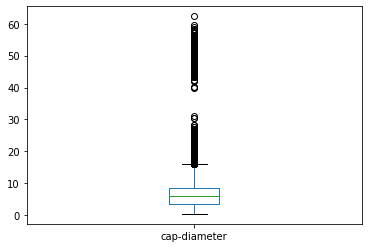

In [84]:
plot_boxplot(df_raw_train, 'cap-diameter')

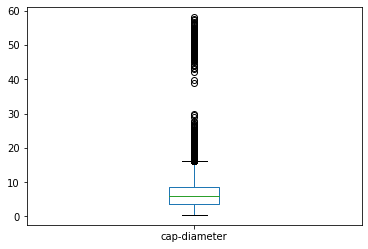

In [85]:
plot_boxplot(df_raw_test, 'cap-diameter')

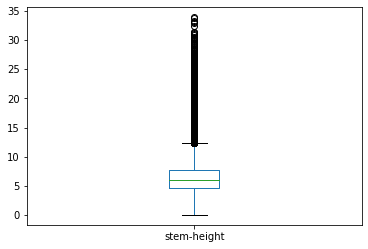

In [86]:
  plot_boxplot(df_raw_train, 'stem-height')

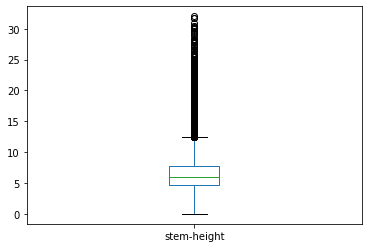

In [87]:
  plot_boxplot(df_raw_test, 'stem-height')

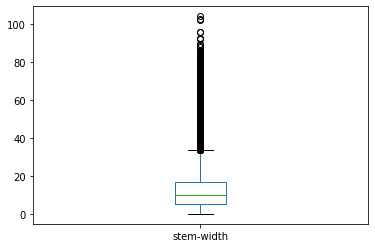

In [88]:
plot_boxplot(df_raw_train, 'stem-width')

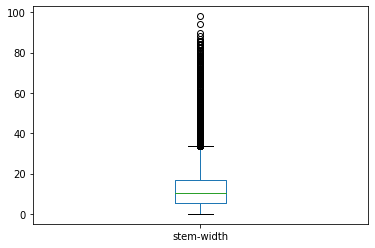

In [91]:
plot_boxplot(df_raw_test, 'stem-width')

In [92]:
df_raw_train.shape

(42748, 14)

In [93]:
cols = ['cap-diameter', 'stem-height','stem-width'] # one or more

Q1 = df_raw_train[cols].quantile(0.25)
Q3 = df_raw_train[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_train = df_raw_train[~((df_raw_train[cols] < (Q1 - 1.5 * IQR)) |(df_raw_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [94]:
df_new_train.shape

(39011, 14)

In [95]:
cols = ['cap-diameter', 'stem-height','stem-width'] # one or more

Q1 = df_raw_test[cols].quantile(0.25)
Q3 = df_raw_test[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_test = df_raw_test[~((df_raw_test[cols] < (Q1 - 1.5 * IQR)) |(df_raw_test[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [104]:
df_new_test.shape

(16731, 14)

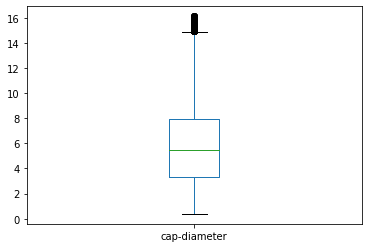

In [96]:
  plot_boxplot(df_new_train, 'cap-diameter')

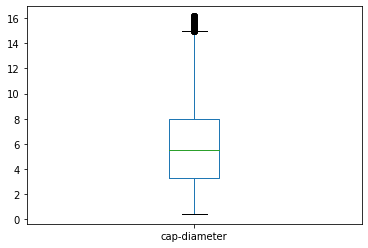

In [97]:
  plot_boxplot(df_new_test, 'cap-diameter')

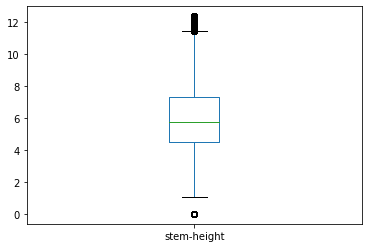

In [98]:
  plot_boxplot(df_new_train, 'stem-height')

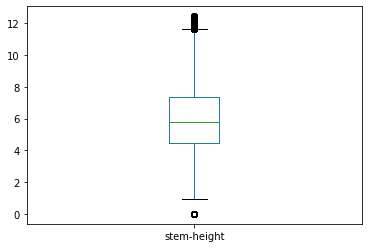

In [99]:
  plot_boxplot(df_new_test, 'stem-height')

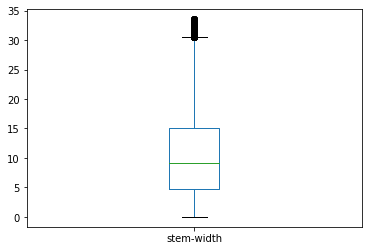

In [42]:
  plot_boxplot(df_new_train, 'stem-width')

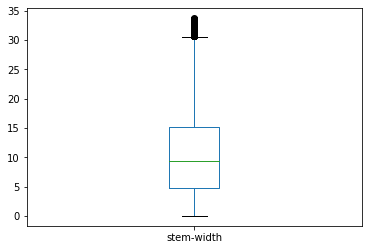

In [100]:
  plot_boxplot(df_new_test, 'stem-width')

In [103]:
df_new_test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,4.68,x,w,f,x,w,8.22,9.58,n,t,f,g,NaN
1,p,10.33,x,y,f,a,y,11.98,13.29,y,t,f,d,NaN
2,p,9.26,x,w,t,a,w,7.41,12.68,w,t,l,g,NaN
3,p,14.90,s,w,t,d,w,5.33,23.03,w,f,f,d,NaN
4,p,1.01,x,w,f,a,w,3.17,1.64,e,f,f,l,NaN


In [47]:
df_new_test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,4.68,x,w,f,x,w,8.22,9.58,n,t,f,g,NaN
1,p,10.33,x,y,f,a,y,11.98,13.29,y,t,f,d,NaN
2,p,9.26,x,w,t,a,w,7.41,12.68,w,t,l,g,NaN
3,p,14.90,s,w,t,d,w,5.33,23.03,w,f,f,d,NaN
4,p,1.01,x,w,f,a,w,3.17,1.64,e,f,f,l,NaN


In [106]:
from sklearn.preprocessing import LabelEncoder

In [109]:
LE = LabelEncoder()

In [110]:
df_new_train['edible-poisonous'] = LE.fit_transform(df_new_train['edible-poisonous'])
df_new_train['cap-shape'] = LE.fit_transform(df_new_train['cap-shape'])
df_new_train['cap-color'] = LE.fit_transform(df_new_train['cap-color'])
df_new_train['does-bruise-or-bleed'] = LE.fit_transform(df_new_train['does-bruise-or-bleed'])
df_new_train['gill-attachment'] = LE.fit_transform(df_new_train['gill-attachment'])
df_new_train['gill-color'] = LE.fit_transform(df_new_train['gill-color'])
df_new_train['stem-color'] = LE.fit_transform(df_new_train['stem-color'])
df_new_train['has-ring'] = LE.fit_transform(df_new_train['has-ring'])
df_new_train['ring-type'] = LE.fit_transform(df_new_train['ring-type'])
df_new_train['habitat'] = LE.fit_transform(df_new_train['habitat'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [112]:
df_new_test['edible-poisonous'] = LE.fit_transform(df_new_test['edible-poisonous'])
df_new_test['cap-shape'] = LE.fit_transform(df_new_test['cap-shape'])
df_new_test['cap-color'] = LE.fit_transform(df_new_test['cap-color'])
df_new_test['does-bruise-or-bleed'] = LE.fit_transform(df_new_test['does-bruise-or-bleed'])
df_new_test['gill-attachment'] = LE.fit_transform(df_new_test['gill-attachment'])
df_new_test['gill-color'] = LE.fit_transform(df_new_test['gill-color'])
df_new_test['stem-color'] = LE.fit_transform(df_new_test['stem-color'])
df_new_test['has-ring'] = LE.fit_transform(df_new_test['has-ring'])
df_new_test['ring-type'] = LE.fit_transform(df_new_test['ring-type'])
df_new_test['habitat'] = LE.fit_transform(df_new_test['habitat'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [52]:
df_new_train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,5.75,6,5,1,5,10,6.13,14.93,11,0,1,0,a
1,1,2.27,3,2,0,3,2,0.00,0.00,2,0,1,0,s
2,1,5.59,1,11,1,6,7,5.47,11.27,11,0,1,0,a
3,1,0.74,6,7,0,0,5,4.33,0.98,4,0,1,0,a
4,1,9.60,6,5,0,0,10,10.84,28.52,11,0,1,0,u


In [113]:
df_new_test.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,4.68,6,10,0,6,10,8.22,9.58,6,1,1,1,NaN
1,1,10.33,6,11,0,0,11,11.98,13.29,12,1,1,0,NaN
2,1,9.26,6,10,1,0,10,7.41,12.68,11,1,3,1,NaN
3,1,14.90,5,10,1,1,10,5.33,23.03,11,0,1,0,NaN
4,1,1.01,6,10,0,0,10,3.17,1.64,1,0,1,3,NaN


**Splitting X and Y**

In [122]:
x_train = df_new_train.iloc[:,0:13]

In [125]:
y=pd.factorize(df_new_train['season'])

In [128]:
y=df_new_train['season']

In [135]:
x_test_data = df_new_test.iloc[:,0:13]

**Standardization**

In [118]:
from sklearn.preprocessing import StandardScaler
x_scale_train = StandardScaler().fit_transform(x_train)

In [136]:
from sklearn.preprocessing import StandardScaler
x_scale_test = StandardScaler().fit_transform(x_test_data)

**Splitting Train and Test**

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale_train,y, test_size=0.25, random_state=20, stratify=y)

**Model fitting with KNN**

In [139]:
from sklearn.neighbors import KNeighborsClassifier
KNN_CLF = KNeighborsClassifier()
KNN_CLF.fit(x_train,y_train)
y_pred_knn = KNN_CLF.predict(x_scale_test)

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
acc_score_knn = accuracy_score(y_test,y_pred_knn)

In [133]:
acc_score_knn

0.51973751666154

In [134]:
test_accuracy =[]
k_values = range(1,16)

In [39]:
for i in k_values:
    knn_clf =KNeighborsClassifier(n_neighbors=i, p=2)
    KNN_CLF.fit(x_train,y_train)
    y_pred_knn = KNN_CLF.predict(x_scale_test)
    test_accuracy.append(accuracy_score(y_pred_knn,y_test).round(2))

In [40]:
print(test_accuracy)

[0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52]


No handles with labels found to put in legend.


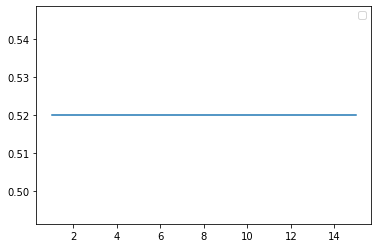

In [41]:
import matplotlib.pyplot as plt
plt.plot(k_values,test_accuracy)
plt.legend()
plt.show()

**Model fitting with SVM**

In [42]:
from sklearn.svm import SVC
sv_clf = SVC(kernel = "rbf", gamma = 'auto')
sv_clf.fit(x_train,y_train)
y_pred_sv = sv_clf.predict(x_scale_test)

In [44]:
acc_score_svc = accuracy_score(y_test,y_pred_sv)

In [45]:
acc_score_svc

0.5277350558802419

**Model fitting with Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred_log = log_reg.predict(x_scale_test)

In [ ]:
y_pred_log

array(['a', 'a', 'a', ..., 'a', 'a', 'a'], dtype=object)

In [47]:
acc_score_log = accuracy_score(y_test,y_pred_log).round(3)

In [48]:
acc_score_log

0.499

***Model fitting with Decision Tree***

In [49]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_scale_test)

In [50]:
y_pred_dt

array(['a', 'a', 'a', ..., 'a', 'a', 'u'], dtype=object)

In [51]:
acc_score_dt = accuracy_score(y_test,y_pred_dt).round(3)

In [52]:
acc_score_dt

0.518

**Model fitting with Ensemble Methods**

**Ada Bosst**

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier(base_estimator=DT, n_estimators=100)
ADB.fit(x_train,y_train)
y_pred_adb = ADB.predict(x_scale_test)

In [54]:
acc_score_adb = accuracy_score(y_test,y_pred_adb).round(3)

In [55]:
acc_score_adb

0.522

**Gradient Boosting**

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
GRB = GradientBoostingClassifier(n_estimators=100)
GRB.fit(x_train,y_train)
y_pred_grb= GRB.predict(x_scale_test)

In [57]:
acc_score_grb = accuracy_score(y_test,y_pred_grb).round(3)

In [58]:
acc_score_grb

0.517

**XG Boosting**

In [59]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
y_pred_xgb= XGB.predict(x_scale_test)

In [60]:
acc_score_xgb = accuracy_score(y_test,y_pred_xgb).round(3)

In [61]:
acc_score_xgb

0.518

**Model fitting With Bagging**

In [62]:
from sklearn.ensemble import BaggingClassifier
Bag= BaggingClassifier()

In [63]:
Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)


In [64]:
Bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)

In [66]:
y_pred_bag= Bag.predict(x_scale_test)

In [67]:
acc_score_bag = accuracy_score(y_test,y_pred_bag).round(3)

In [68]:
acc_score_bag

0.52

In [69]:
acc_score_bagging=[]
settings = np.arange(0.1,1,0.1)

In [70]:
for i in settings:
    bag = BaggingClassifier(base_estimator=DT, max_samples=i, n_estimators=100, random_state=10)
    bag.fit(x_train,y_train)
    y_pred_bg = bag.predict(x_scale_test)
    acc_score_bagging.append(accuracy_score(y_pred_bg,y_test))

In [71]:
print(acc_score_bagging)

[0.5186096585665949, 0.526402132677125, 0.5229160258382036, 0.5191223213370245, 0.5168666051471342, 0.5219932328514303, 0.5212755049728288, 0.5181995283502512, 0.5204552445401415]
